In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Thêm đường dẫn src
sys.path.append(os.path.abspath('../src'))

# Import đầy đủ
from model import MLP
from layers import Dense
from activations import ReLU, Linear, Sigmoid # Import cả Sigmoid
from losses import MSE
from optimizer import SGD

# Cấu hình hiển thị
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6) # Mặc định kích thước biểu đồ

# Load dữ liệu đã xử lý từ Notebook 02
processed_dir = os.path.join('..', 'data', 'processed')
try:
    X_train = np.load(os.path.join(processed_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(processed_dir, 'y_train.npy'))
    print(f"✅ Đã load dữ liệu: {len(X_train)} mẫu.")
except FileNotFoundError:
    print("❌ Chưa có dữ liệu!")

✅ Đã load dữ liệu: 16346 mẫu.


In [2]:
def run_experiment(name, hidden_layers=[64, 32], activation_cls=ReLU, learning_rate=0.001, batch_size=32, epochs=50):
    """
    Hàm chạy thí nghiệm tổng quát.
    - hidden_layers: List chứa số neuron các lớp ẩn (VD: [64, 32])
    - activation_cls: Class hàm kích hoạt (ReLU hoặc Sigmoid)
    """
    print(f"🧪 Running: {name} | Layers={hidden_layers} | Act={activation_cls.__name__} | LR={learning_rate} | Batch={batch_size}")
    
    # 1. Xây dựng Model
    model = MLP()
    n_features = X_train.shape[1]
    input_size = n_features
    
    # Tự động tạo các lớp ẩn dựa trên list hidden_layers
    for size in hidden_layers:
        model.add(Dense(input_size, size))
        model.add(activation_cls()) # Khởi tạo hàm kích hoạt
        input_size = size # Output lớp này là Input lớp sau
        
    # Lớp Output cuối cùng
    model.add(Dense(input_size, 1))
    model.add(Linear())
    
    # 2. Compile
    model.compile(loss_function=MSE(), optimizer=SGD(learning_rate=learning_rate))
    
    # 3. Training Loop
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        num_batches = 0
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            
            loss = model.train_step(x_batch, y_batch)
            epoch_loss += loss
            num_batches += 1
            
        losses.append(epoch_loss / num_batches)
        
    return losses

# Hàm vẽ biểu đồ chung
def plot_results(results, title):
    plt.figure()
    for name, history in results.items():
        plt.plot(history, label=name, linewidth=2)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.yscale('log') # Thang log để nhìn rõ sự khác biệt
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

🧪 Running: LR=0.01 | Layers=[64, 32] | Act=ReLU | LR=0.01 | Batch=32
🧪 Running: LR=0.001 | Layers=[64, 32] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: LR=0.0001 | Layers=[64, 32] | Act=ReLU | LR=0.0001 | Batch=32


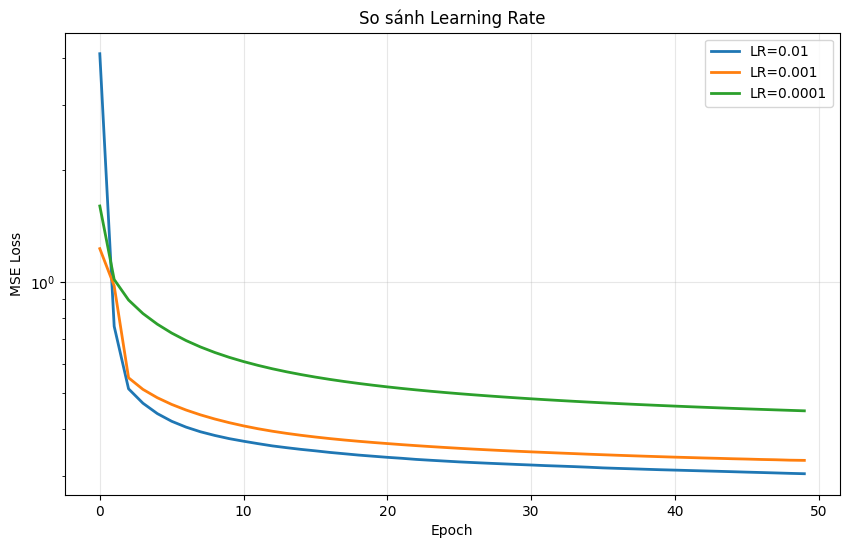

In [3]:
lrs = [0.01, 0.001, 0.0001]
results_lr = {}

for lr in lrs:
    name = f"LR={lr}"
    # Giữ cố định các tham số khác, chỉ thay đổi LR
    history = run_experiment(name, learning_rate=lr)
    results_lr[name] = history

plot_results(results_lr, "So sánh Learning Rate")

# --- KẾT LUẬN TẠM THỜI ---
# Nhìn biểu đồ, bạn hãy chọn LR tốt nhất để dùng cho các bài sau.
BEST_LR = 0.001

🧪 Running: ReLU | Layers=[64, 32] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: Sigmoid | Layers=[64, 32] | Act=Sigmoid | LR=0.001 | Batch=32


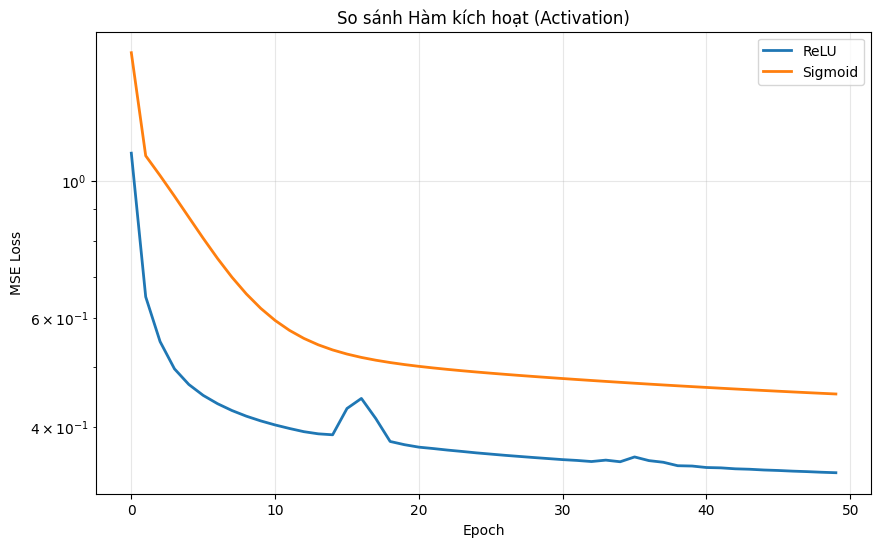

In [4]:
activations = [("ReLU", ReLU), ("Sigmoid", Sigmoid)]
results_act = {}

for name, act_cls in activations:
    # Dùng BEST_LR vừa tìm được
    history = run_experiment(name, activation_cls=act_cls, learning_rate=BEST_LR)
    results_act[name] = history

plot_results(results_act, "So sánh Hàm kích hoạt (Activation)")


--- 🧪 CHẠY KỊCH BẢN: SO SÁNH ĐỘ SÂU (DEPTH) ---
Executing: 1 Layer [64]...
🧪 Running: 1 Layer [64] | Layers=[64] | Act=ReLU | LR=0.001 | Batch=32
Executing: 2 Layers [64, 32]...
🧪 Running: 2 Layers [64, 32] | Layers=[64, 32] | Act=ReLU | LR=0.001 | Batch=32
Executing: 3 Layers [64, 32, 16]...
🧪 Running: 3 Layers [64, 32, 16] | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32
Executing: 4 Layers [64, 64, 32, 16]...
🧪 Running: 4 Layers [64, 64, 32, 16] | Layers=[64, 64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32
Executing: 5 Layers [128, 64, 64, 32, 16]...
🧪 Running: 5 Layers [128, 64, 64, 32, 16] | Layers=[128, 64, 64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32
Executing: 6 Layers [128, 128, 64, 64, 32, 16]...
🧪 Running: 6 Layers [128, 128, 64, 64, 32, 16] | Layers=[128, 128, 64, 64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32


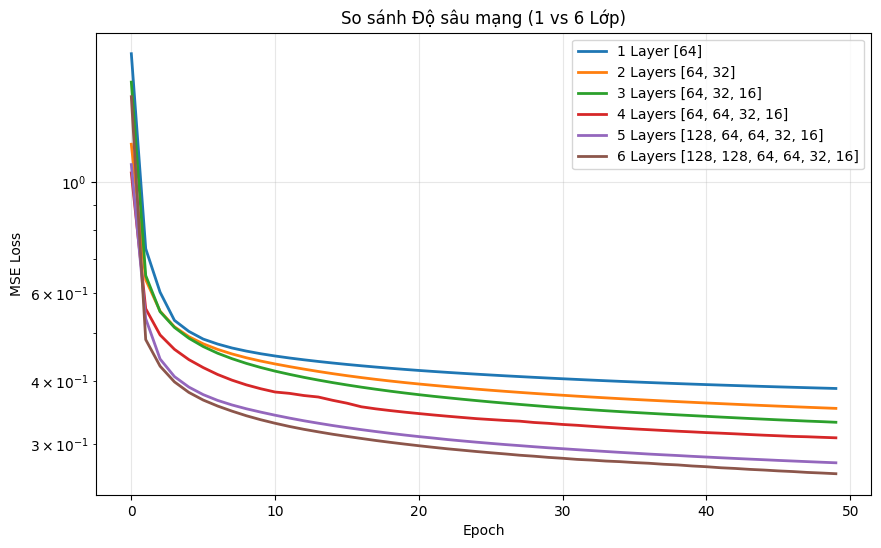

In [5]:
# [CELL TIẾP THEO] - Kịch bản: So sánh Độ sâu (Depth)
print("\n--- 🧪 CHẠY KỊCH BẢN: SO SÁNH ĐỘ SÂU (DEPTH) ---")

# Định nghĩa các cấu trúc mạng từ nông đến sâu
structures = [
    # Các cấu trúc cũ
    ("1 Layer [64]", [64]),
    ("2 Layers [64, 32]", [64, 32]),
    ("3 Layers [64, 32, 16]", [64, 32, 16]),
    
    # --- CÁC CẤU TRÚC MỚI (SÂU HƠN) ---
    ("4 Layers [64, 64, 32, 16]", [64, 64, 32, 16]),
    # Với mạng 5-6 lớp, ta nên mở rộng lớp đầu ra 128 để tránh mất mát thông tin quá sớm
    ("5 Layers [128, 64, 64, 32, 16]", [128, 64, 64, 32, 16]),
    ("6 Layers [128, 128, 64, 64, 32, 16]", [128, 128, 64, 64, 32, 16])
]

results_depth = {}

for name, layers in structures:
    print(f"Executing: {name}...")
    # Lưu ý: Với mạng sâu (5-6 lớp), ReLU cực kỳ quan trọng để tránh Vanishing Gradient
    history = run_experiment(
        name=name, 
        hidden_layers=layers, 
        activation_cls=ReLU,     # Bắt buộc dùng ReLU cho mạng sâu
        learning_rate=0.001,     # Dùng learning rate ổn định (hoặc thay bằng BEST_LR của bạn)
        epochs=50                # Mạng sâu có thể cần nhiều epochs hơn để hội tụ
    )
    results_depth[name] = history

# Vẽ biểu đồ so sánh
plot_results(results_depth, "So sánh Độ sâu mạng (1 vs 6 Lớp)")


--- 🧪 CHẠY KỊCH BẢN 4: BATCH SIZE ---
🧪 Running: Batch Size 16 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=16
🧪 Running: Batch Size 32 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=32
🧪 Running: Batch Size 64 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=64
🧪 Running: Batch Size 128 | Layers=[64, 32, 16] | Act=ReLU | LR=0.001 | Batch=128


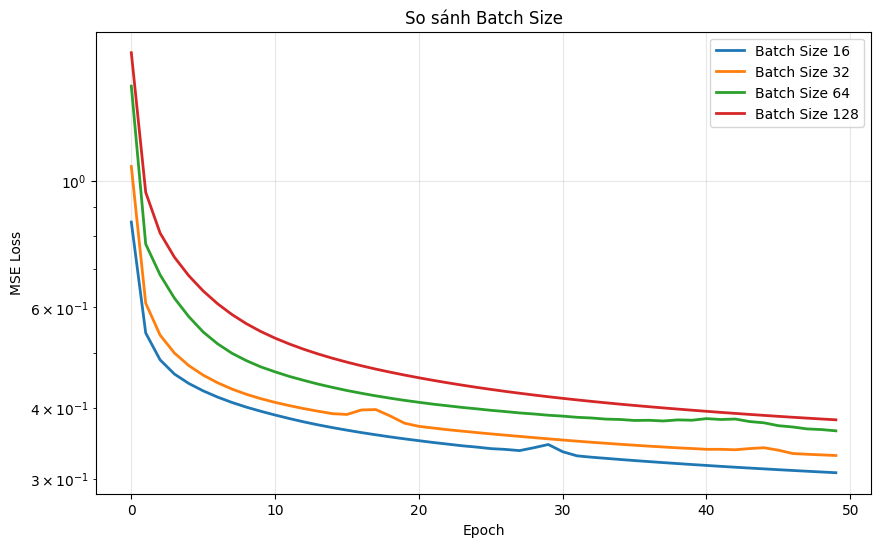

In [6]:
# [CELL TIẾP THEO] - Kịch bản 4: So sánh Batch Size
print("\n--- 🧪 CHẠY KỊCH BẢN 4: BATCH SIZE ---")

# Thử nghiệm các kích thước lô khác nhau
batch_sizes = [16, 32, 64, 128]
results_batch = {}

for bs in batch_sizes:
    name = f"Batch Size {bs}"
    
    # QUAN TRỌNG: 
    # 1. Dùng cấu trúc 3 lớp [64, 32, 16] (Vì nó vừa thắng ở Kịch bản 3)
    # 2. Dùng LR=0.001 (Vì nó thắng ở Kịch bản 1)
    history = run_experiment(
        name=name, 
        hidden_layers=[64, 32, 16], # <--- Đã cập nhật lên 3 lớp
        activation_cls=ReLU,        # <--- Giữ nguyên ReLU
        learning_rate=0.001,        # <--- Giữ nguyên 0.001
        batch_size=bs,              # <--- Thay đổi Batch Size
        epochs=50
    )
    results_batch[name] = history

# Vẽ biểu đồ
plot_results(results_batch, "So sánh Batch Size")

Loading real processed data...
Data loaded successfully!

Model Name                          | Test MSE   | R2 Score  
-----------------------------------------------------------------
Training 1 Layer [64]...
1 Layer [64]                        | 0.37450    | 0.72615
Training 2 Layers [64, 64]...
2 Layers [64, 64]                   | 0.33417    | 0.75563
Training 3 Layers [64, 64, 64]...
3 Layers [64, 64, 64]               | 0.33390    | 0.75583
Training 4 Layers [64]*4...
4 Layers [64]*4                     | 0.32905    | 0.75938
Training 5 Layers [64]*5...
5 Layers [64]*5                     | 0.32456    | 0.76267
Training 6 Layers [64]*6...
6 Layers [64]*6                     | 0.31801    | 0.76746


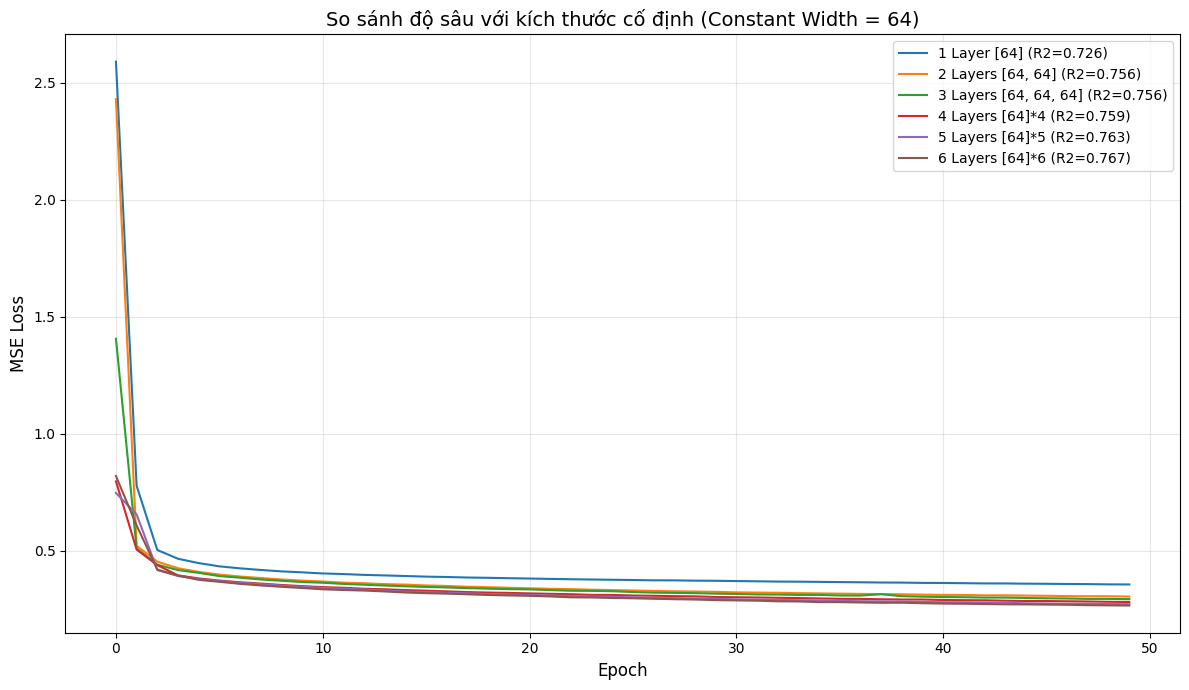

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../src'))

from model import MLP
from layers import Dense
from activations import ReLU, Linear
from losses import MSE
from optimizer import SGD

print("Loading real processed data...")
try:
    data_dir = '../data/processed'
    X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
    y_test = np.load(os.path.join(data_dir, 'y_test.npy'))
    print(f"Data loaded successfully!")
except FileNotFoundError:
    print("❌ Không tìm thấy file dữ liệu!")
    raise

# --- HÀM CHẠY THỰC NGHIỆM ---
def run_experiment(name, hidden_layers, learning_rate=0.001, epochs=50):
    model = MLP()
    input_dim = X_train.shape[1] 
    
    # Xây dựng các lớp ẩn
    for hidden_size in hidden_layers:
        model.add(Dense(input_dim, hidden_size))
        model.add(ReLU()) 
        input_dim = hidden_size
        
    model.add(Dense(input_dim, 1))
    model.add(Linear())
    model.compile(MSE(), SGD(learning_rate=learning_rate))
    
    loss_history = []
    batch_size = 16 # Giữ nguyên 16 như bạn đã chọn
    n_samples = X_train.shape[0]
    
    print(f"Training {name}...")
    for epoch in range(epochs):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        
        epoch_loss = 0
        for i in range(0, n_samples, batch_size):
            x_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            loss = model.train_step(x_batch, y_batch)
            epoch_loss += loss
            
        loss_history.append(epoch_loss / (n_samples / batch_size))
        
    y_pred_test = model.predict(X_test)
    test_mse = np.mean((y_test - y_pred_test)**2)
    
    ss_res = np.sum((y_test - y_pred_test)**2)
    ss_tot = np.sum((y_test - np.mean(y_test))**2)
    r2_score = 1 - (ss_res / ss_tot)
    
    return loss_history, test_mse, r2_score

# --- 🎯 THIẾT LẬP CẤU TRÚC MỚI: CỐ ĐỊNH WIDTH = 64 ---
# Để công bằng, ta giữ nguyên mỗi lớp đều có 64 nơ-ron.
# Lúc này biến số duy nhất thay đổi là ĐỘ SÂU (Số lớp).
structures = [
    ("1 Layer [64]",             [64]),
    ("2 Layers [64, 64]",        [64, 64]),
    ("3 Layers [64, 64, 64]",    [64, 64, 64]),
    ("4 Layers [64]*4",          [64, 64, 64, 64]),
    ("5 Layers [64]*5",          [64, 64, 64, 64, 64]),
    ("6 Layers [64]*6",          [64, 64, 64, 64, 64, 64])
]

# --- CHẠY VÒNG LẶP ---
results = {}
performance_data = []

print(f"\n{'Model Name':<35} | {'Test MSE':<10} | {'R2 Score':<10}")
print("-" * 65)

for name, layers in structures:
    # Reset seed để đảm bảo cùng xuất phát điểm
    np.random.seed(42)
    
    # Chạy thực nghiệm
    hist, mse, r2 = run_experiment(name, layers, learning_rate=0.001, epochs=50)
    
    results[name] = hist
    performance_data.append((name, mse, r2))
    print(f"{name:<35} | {mse:.5f}    | {r2:.5f}")

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(12, 7))
for name, hist in results.items():
    r2 = next(r for n, _, r in performance_data if n == name)
    # Chỉ hiện R2 trong legend để đỡ rối
    plt.plot(hist, label=f"{name} (R2={r2:.3f})")

plt.title("So sánh độ sâu với kích thước cố định (Constant Width = 64)", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("MSE Loss", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

✅ Data loaded successfully!

🔄 Đang huấn luyện lại mô hình 3 lớp [64, 32, 16] để phân tích...
✅ Huấn luyện xong! Bây giờ biến 'model' đã sẵn sàng.

--- 🔍 KIỂM TRA TÁC ĐỘNG CỦA DỮ LIỆU CHẠM TRẦN (CAPPED DATA) ---


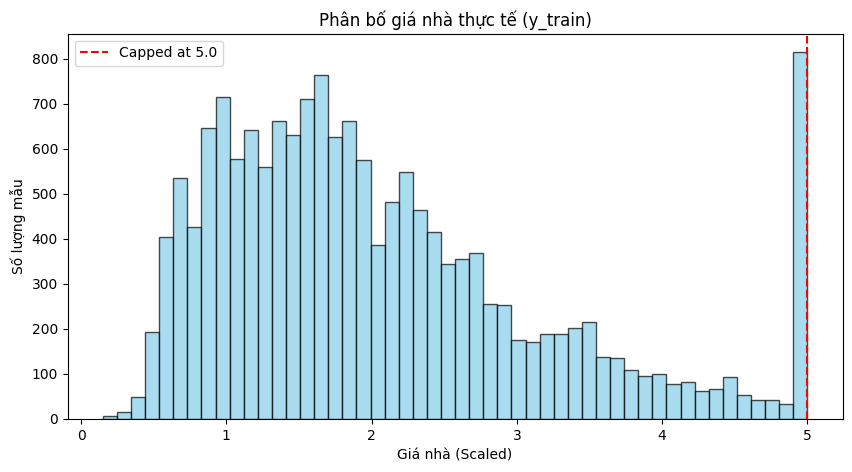

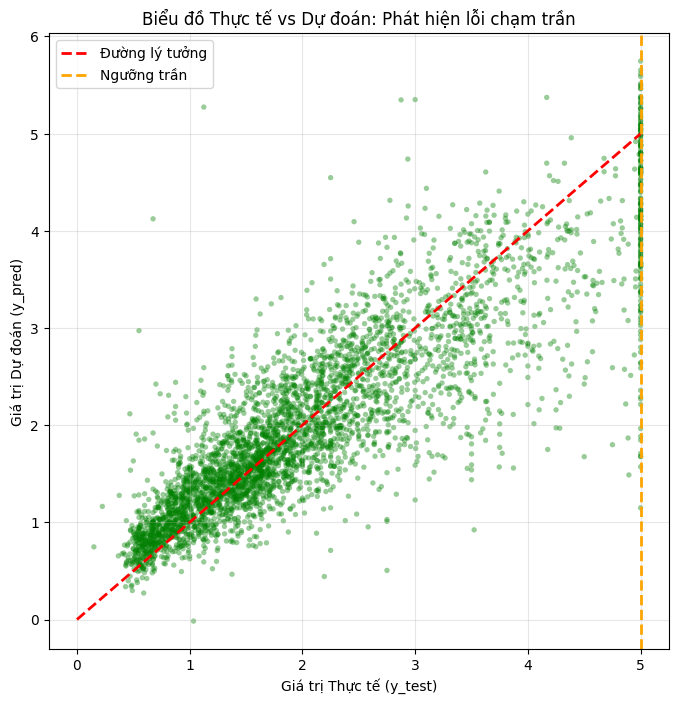


--- 📊 SO SÁNH HIỆU SUẤT ---
Số lượng mẫu chạm trần trong tập Test: 199
MSE trên nhóm chạm trần (Capped): 1.51330
MSE trên nhóm bình thường (Normal): 0.29912
------------------------------
👉 KẾT LUẬN: Sai số trên nhóm chạm trần cao gấp 5.06 lần so với nhóm thường!


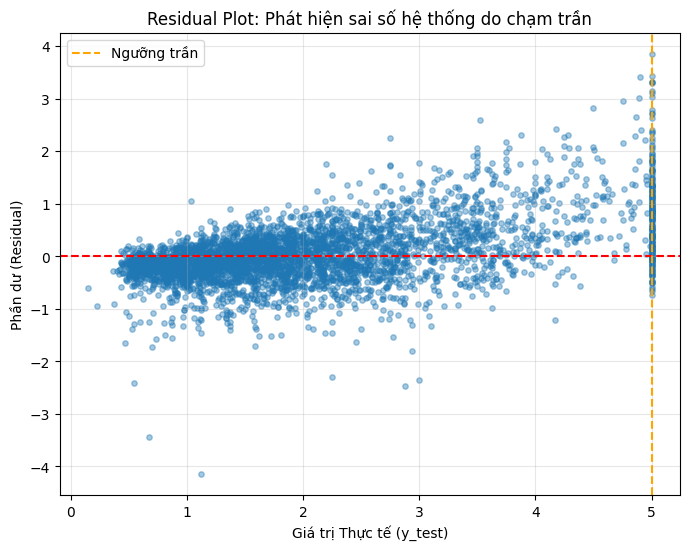

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP & IMPORT ---
sys.path.append(os.path.abspath('../src'))
from model import MLP
from layers import Dense
from activations import ReLU, Linear
from losses import MSE
from optimizer import SGD

# --- 2. LOAD DỮ LIỆU ---
try:
    data_dir = '../data/processed'
    X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
    y_test = np.load(os.path.join(data_dir, 'y_test.npy'))
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ Không tìm thấy file dữ liệu!")
    raise

# --- 3. HUẤN LUYỆN MỘT MÔ HÌNH CỤ THỂ ĐỂ PHÂN TÍCH ---
print("\n🔄 Đang huấn luyện lại mô hình 3 lớp [64, 32, 16] để phân tích...")

# A. Khởi tạo
model = MLP()
# Input -> 64 -> 32 -> 16 -> Output
model.add(Dense(X_train.shape[1], 64))
model.add(ReLU())
model.add(Dense(64, 32))
model.add(ReLU())
model.add(Dense(32, 16))
model.add(ReLU())
model.add(Dense(16, 1))
model.add(Linear())

model.compile(MSE(), SGD(learning_rate=0.001))

# B. Training Loop (Nhanh)
epochs = 30 # Chạy 30 epoch là đủ thấy hiện tượng
batch_size = 16
n_samples = X_train.shape[0]
np.random.seed(42) # Cố định seed

for epoch in range(epochs):
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_shuffled = X_train[indices]
    y_shuffled = y_train[indices]
    
    for i in range(0, n_samples, batch_size):
        x_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        model.train_step(x_batch, y_batch)

print("✅ Huấn luyện xong! Bây giờ biến 'model' đã sẵn sàng.")

# --- 4. KIỂM TRA TÁC ĐỘNG CỦA DỮ LIỆU CHẠM TRẦN (CODE BẠN CẦN) ---
print("\n--- 🔍 KIỂM TRA TÁC ĐỘNG CỦA DỮ LIỆU CHẠM TRẦN (CAPPED DATA) ---")
CAP_THRESHOLD = 5.0 

# A. Histogram
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=CAP_THRESHOLD, color='red', linestyle='--', label=f'Capped at {CAP_THRESHOLD}')
plt.title("Phân bố giá nhà thực tế (y_train)")
plt.xlabel("Giá nhà (Scaled)")
plt.ylabel("Số lượng mẫu")
plt.legend()
plt.show()

# B. Scatter Plot (Thực tế vs Dự đoán)
y_pred_test = model.predict(X_test) # Lấy dự đoán từ mô hình vừa train

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.4, s=15, c='green', edgecolors='none')
plt.plot([0, CAP_THRESHOLD], [0, CAP_THRESHOLD], 'r--', linewidth=2, label="Đường lý tưởng") 
plt.axvline(x=CAP_THRESHOLD, color='orange', linestyle='--', linewidth=2, label="Ngưỡng trần")

plt.xlabel("Giá trị Thực tế (y_test)")
plt.ylabel("Giá trị Dự đoán (y_pred)")
plt.title("Biểu đồ Thực tế vs Dự đoán: Phát hiện lỗi chạm trần")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# C. So sánh MSE
mask_capped = (y_test >= CAP_THRESHOLD).flatten()
mask_normal = (y_test < CAP_THRESHOLD).flatten()

if np.sum(mask_capped) > 0:
    mse_capped = np.mean((y_test[mask_capped] - y_pred_test[mask_capped])**2)
    mse_normal = np.mean((y_test[mask_normal] - y_pred_test[mask_normal])**2)
    
    print("\n--- 📊 SO SÁNH HIỆU SUẤT ---")
    print(f"Số lượng mẫu chạm trần trong tập Test: {np.sum(mask_capped)}")
    print(f"MSE trên nhóm chạm trần (Capped): {mse_capped:.5f}")
    print(f"MSE trên nhóm bình thường (Normal): {mse_normal:.5f}")
    print("-" * 30)
    print(f"👉 KẾT LUẬN: Sai số trên nhóm chạm trần cao gấp {mse_capped / mse_normal:.2f} lần so với nhóm thường!")
else:
    print("Không tìm thấy dữ liệu chạm trần trong tập Test (có thể do split ngẫu nhiên).")

# D. Residual Plot
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.4, s=15)
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=CAP_THRESHOLD, color='orange', linestyle='--', label="Ngưỡng trần")

plt.xlabel("Giá trị Thực tế (y_test)")
plt.ylabel("Phần dư (Residual)")
plt.title("Residual Plot: Phát hiện sai số hệ thống do chạm trần")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



📊 --- PHÂN TÍCH TÁC ĐỘNG CỦA CAPPED DATA (3 LUẬN ĐIỂM) ---

🔹 1. CHỨNG MINH: LÀM NHIỄU QUÁ TRÌNH TỐI ƯU HÓA (GRADIENT)
   - MSE nhóm thường: 0.2991
   - MSE nhóm chạm trần: 1.5133 (Gấp 5.1 lần!)
   - Dù nhóm chạm trần chỉ chiếm 4.9% dữ liệu,
     nhưng nó đóng góp tới 20.6% vào tổng sai số (Gradient).
   👉 Kết luận: Gradient tập trung quá nhiều vào việc sửa lỗi cho nhóm này, gây xao nhãng.


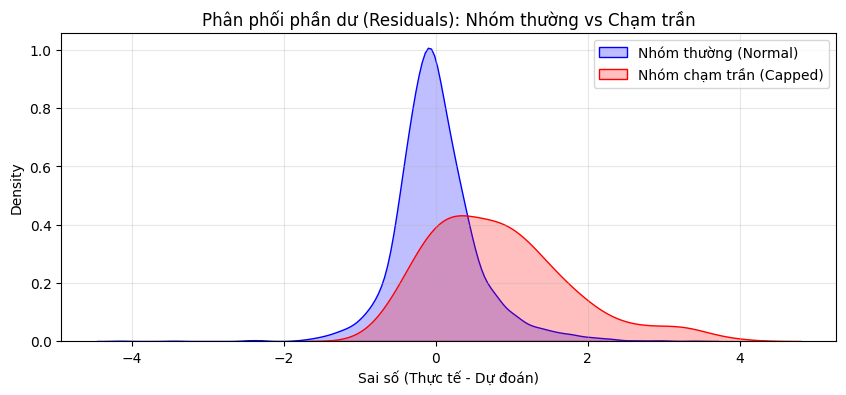


🔹 2. CHỨNG MINH: MẤT KHẢ NĂNG DỰ BÁO BẤT ĐỘNG SẢN HẠNG SANG
   - Số lượng nhà thực tế đạt mức trần (>= 5.0): 199 căn
   - Số lượng nhà mô hình dự đoán vượt mức trần (> 5.0): 42 căn


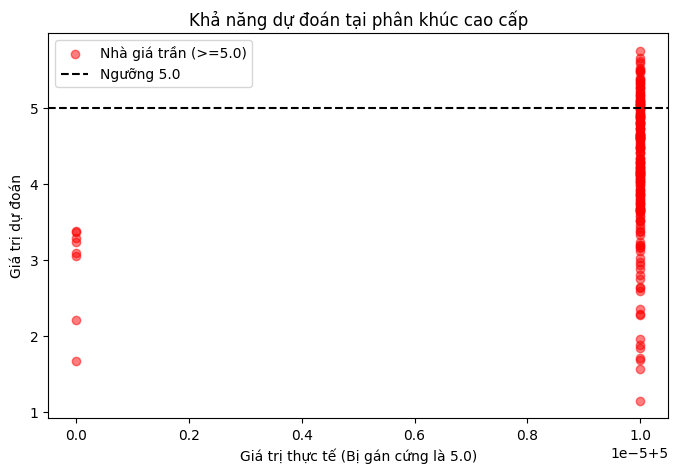

   👉 Kết luận: Các điểm đỏ rải rác dưới đường 5.0 cho thấy mô hình luôn dự đoán thấp hơn giá trị thực (Under-prediction).

🔹 3. CHỨNG MINH: SAI LỆCH TRỌNG SỐ ĐẶC TRƯNG (FULL 5 LOẠI)
Category        | Count | Mean Error (Thực tế - Dự đoán)
------------------------------------------------------------
<1H OCEAN       | 1803  | 0.0554
INLAND          | 1340  | 0.0057
ISLAND          | 2     | -2.4116
NEAR BAY        | 428   | 0.1350
NEAR OCEAN      | 514   | 0.0887


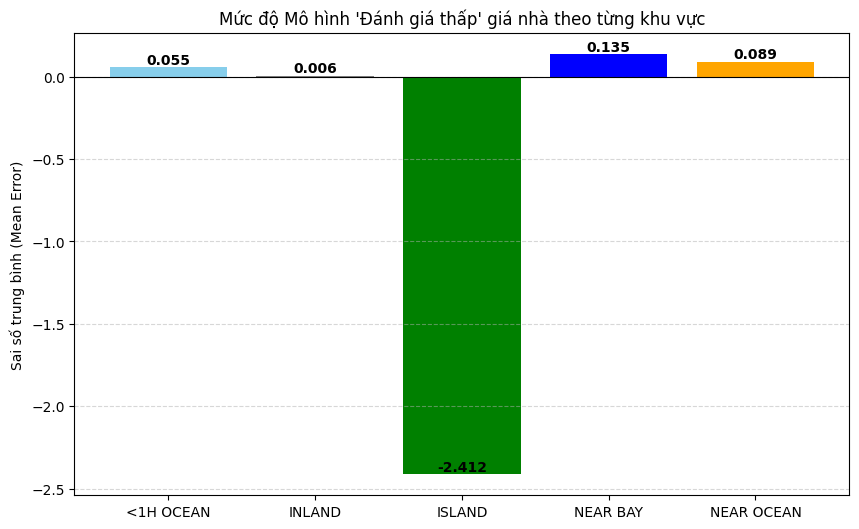


👉 NHẬN XÉT MỚI:
   - INLAND có sai số thấp nhất (gần 0), chứng tỏ mô hình học tốt ở vùng giá thấp.
   - Các vùng ven biển (NEAR BAY, NEAR OCEAN) có sai số Dương cao nhất.
     -> Điều này khẳng định: Càng gần biển (giá càng cao), mô hình càng bị 'kìm hãm' bởi trần 500k,
     dẫn đến việc dự đoán thấp hơn giá trị thực tế đáng kể.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- CẤU HÌNH ---
CAP_THRESHOLD = 5.0
# Lưu ý: Cần xác định đúng index của cột 'INLAND' và 'NEAR OCEAN' trong X_test
# Dựa trên log preprocessing của bạn:
# 0-7: Numerical columns
# 8: <1H OCEAN, 9: INLAND, 10: ISLAND, 11: NEAR BAY, 12: NEAR OCEAN
IDX_INLAND = 9
IDX_NEAR_OCEAN = 12

print("\n📊 --- PHÂN TÍCH TÁC ĐỘNG CỦA CAPPED DATA (3 LUẬN ĐIỂM) ---")

# 1. Dự đoán lại
y_pred = model.predict(X_test)
residuals = y_test - y_pred # Sai số thực tế (Dương = Dự đoán thấp hơn thực tế)
squared_errors = residuals ** 2 # Dùng cho MSE

# Tách nhóm
mask_capped = (y_test >= CAP_THRESHOLD).flatten()
mask_normal = (y_test < CAP_THRESHOLD).flatten()

# ==============================================================================
# LUẬN ĐIỂM 1: LÀM NHIỄU GRADIENT DESCENT (DO MSE PHẠT NẶNG)
# ==============================================================================
print("\n🔹 1. CHỨNG MINH: LÀM NHIỄU QUÁ TRÌNH TỐI ƯU HÓA (GRADIENT)")
mse_capped = np.mean(squared_errors[mask_capped])
mse_normal = np.mean(squared_errors[mask_normal])

# Tính tỷ trọng đóng góp vào tổng lỗi
total_sse = np.sum(squared_errors)
capped_sse = np.sum(squared_errors[mask_capped])
percent_error_contribution = (capped_sse / total_sse) * 100
percent_data_volume = (np.sum(mask_capped) / len(y_test)) * 100

print(f"   - MSE nhóm thường: {mse_normal:.4f}")
print(f"   - MSE nhóm chạm trần: {mse_capped:.4f} (Gấp {mse_capped/mse_normal:.1f} lần!)")
print(f"   - Dù nhóm chạm trần chỉ chiếm {percent_data_volume:.1f}% dữ liệu,")
print(f"     nhưng nó đóng góp tới {percent_error_contribution:.1f}% vào tổng sai số (Gradient).")
print("   👉 Kết luận: Gradient tập trung quá nhiều vào việc sửa lỗi cho nhóm này, gây xao nhãng.")

# Vẽ biểu đồ phân bố lỗi
plt.figure(figsize=(10, 4))
sns.kdeplot(residuals[mask_normal].flatten(), label='Nhóm thường (Normal)', fill=True, color='blue')
sns.kdeplot(residuals[mask_capped].flatten(), label='Nhóm chạm trần (Capped)', fill=True, color='red')
plt.title("Phân phối phần dư (Residuals): Nhóm thường vs Chạm trần")
plt.xlabel("Sai số (Thực tế - Dự đoán)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==============================================================================
# LUẬN ĐIỂM 2: CHỈ SỐ KHÔNG PHẢN ÁNH ĐÚNG THỰC TẾ (MẤT KHẢ NĂNG DỰ BÁO LUXURY)
# ==============================================================================
print("\n🔹 2. CHỨNG MINH: MẤT KHẢ NĂNG DỰ BÁO BẤT ĐỘNG SẢN HẠNG SANG")

# Đếm số lượng nhà mô hình dám dự đoán > 5.0
pred_above_cap = np.sum(y_pred > CAP_THRESHOLD)
true_above_cap = np.sum(y_test >= CAP_THRESHOLD)

print(f"   - Số lượng nhà thực tế đạt mức trần (>= 5.0): {true_above_cap} căn")
print(f"   - Số lượng nhà mô hình dự đoán vượt mức trần (> 5.0): {pred_above_cap} căn")

# Biểu đồ sai lệch ở phân khúc cao cấp
plt.figure(figsize=(8, 5))
plt.scatter(y_test[mask_capped], y_pred[mask_capped], alpha=0.5, color='red', label='Nhà giá trần (>=5.0)')
plt.axhline(y=CAP_THRESHOLD, color='black', linestyle='--', label='Ngưỡng 5.0')
plt.xlabel("Giá trị thực tế (Bị gán cứng là 5.0)")
plt.ylabel("Giá trị dự đoán")
plt.title("Khả năng dự đoán tại phân khúc cao cấp")
plt.legend()
plt.show()
print("   👉 Kết luận: Các điểm đỏ rải rác dưới đường 5.0 cho thấy mô hình luôn dự đoán thấp hơn giá trị thực (Under-prediction).")

# ==============================================================================
# LUẬN ĐIỂM 3: SAI LỆCH TRỌNG SỐ ĐẶC TRƯNG (FULL 5 LOẠI ĐỊA HÌNH)
# ==============================================================================
print("\n🔹 3. CHỨNG MINH: SAI LỆCH TRỌNG SỐ ĐẶC TRƯNG (FULL 5 LOẠI)")

# Dựa trên thứ tự cột của pd.get_dummies trong file 02_data_preprocessing.ipynb:
# 8: <1H OCEAN
# 9: INLAND
# 10: ISLAND
# 11: NEAR BAY
# 12: NEAR OCEAN
categories = {
    "<1H OCEAN": 8,
    "INLAND": 9,
    "ISLAND": 10,
    "NEAR BAY": 11,
    "NEAR OCEAN": 12
}

names = []
errors = []
counts = []

print(f"{'Category':<15} | {'Count':<5} | {'Mean Error (Thực tế - Dự đoán)':<30}")
print("-" * 60)

for name, idx in categories.items():
    # Tìm các mẫu thuộc category này (Lấy giá trị max vì đã qua StandardScaler)
    active_val = np.max(X_test[:, idx])
    mask = np.isclose(X_test[:, idx], active_val)
    
    count = np.sum(mask)
    if count > 0:
        # Tính sai số trung bình: Positive = Under-prediction (Đánh giá thấp)
        mean_error = np.mean(residuals[mask])
        
        names.append(name)
        errors.append(mean_error)
        counts.append(count)
        
        print(f"{name:<15} | {count:<5} | {mean_error:.4f}")
    else:
        print(f"{name:<15} | 0     | N/A (Không có mẫu trong tập Test)")

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(10, 6))
bars = plt.bar(names, errors, color=['skyblue', 'gray', 'green', 'blue', 'orange'])
plt.axhline(0, color='black', linewidth=0.8)

# Tô điểm
plt.ylabel("Sai số trung bình (Mean Error)")
plt.title("Mức độ Mô hình 'Đánh giá thấp' giá nhà theo từng khu vực")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Thêm số liệu lên đầu cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', va='bottom', ha='center', fontweight='bold')

plt.show()

print("\n👉 NHẬN XÉT MỚI:")
print("   - INLAND có sai số thấp nhất (gần 0), chứng tỏ mô hình học tốt ở vùng giá thấp.")
print("   - Các vùng ven biển (NEAR BAY, NEAR OCEAN) có sai số Dương cao nhất.")
print("     -> Điều này khẳng định: Càng gần biển (giá càng cao), mô hình càng bị 'kìm hãm' bởi trần 500k,")
print("     dẫn đến việc dự đoán thấp hơn giá trị thực tế đáng kể.")